<a href="https://colab.research.google.com/github/Jaoz7926/ML/blob/main/12_KMeans_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 導入必要的庫
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 設置 matplotlib 內聯顯示
%matplotlib inline

# 設置隨機種子以確保結果可重現
np.random.seed(0)

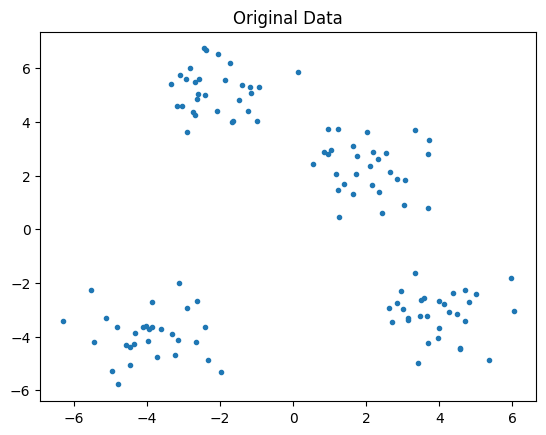

In [2]:
# 生成 120 個隨機數據點，4 個中心
X, y = make_blobs(n_samples=120, centers=[[-4, -4], [2, 2], [-2, 5], [4, -3]], cluster_std=0.9)

# 繪製原始數據散點圖
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.title('Original Data')
plt.show()

In [3]:
# 定義執行 K-means 和繪圖的函數
def run_kmeans(X, n_clusters, title):
    # 訓練 K-means 模型
    model = KMeans(init="k-means++", n_clusters=n_clusters, random_state=0)
    model.fit(X)
    labels = model.labels_
    centers = model.cluster_centers_

    # 打印每個群的點數
    print(f"\n{n_clusters} Clusters - Value Counts:")
    print(pd.Series(labels).value_counts())

    # 打印群中心
    print(f"\n{n_clusters} Clusters - Centers:")
    print(centers)

    # 繪製聚類結果
    fig = plt.figure(figsize=(6, 4))
    colors = plt.cm.magma(np.linspace(0, 0.6, n_clusters))
    ax = fig.add_subplot(1, 1, 1)

    for k, col in zip(range(n_clusters), colors):
        point = (labels == k)
        center = centers[k]
        ax.plot(X[point, 0], X[point, 1], '.', markerfacecolor=col, markersize=10)
        ax.plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=7)

    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()


4 Clusters - Value Counts:
2    30
0    30
1    30
3    30
Name: count, dtype: int64

4 Clusters - Centers:
[[ 3.99780652 -3.15820577]
 [-2.12283317  5.14913244]
 [-3.92794498 -3.93405389]
 [ 2.05061002  2.28879113]]


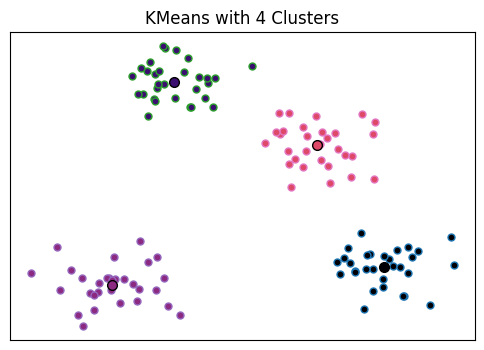

In [4]:
# 執行 K-means 分成 4 群
run_kmeans(X, n_clusters=4, title='KMeans with 4 Clusters')


3 Clusters - Value Counts:
1    57
0    33
2    30
Name: count, dtype: int64

3 Clusters - Centers:
[[ 3.91132085 -2.80160966]
 [-0.1983524   3.87446759]
 [-3.92794498 -3.93405389]]


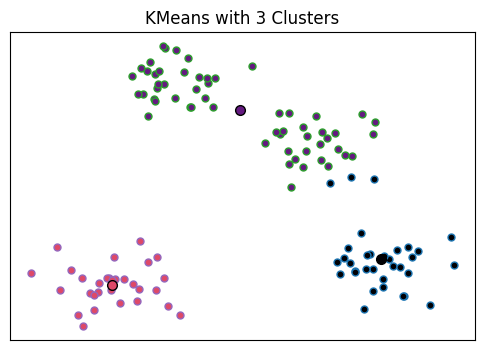

In [5]:
# 執行 K-means 分成 3 群
run_kmeans(X, n_clusters=3, title='KMeans with 3 Clusters')